# Análise de dados dos cursos do UDEMY por número de inscritos
#### Estabeleceu-se para esse projeto a seguinte demanda. A Udemy gostaria de saber como pode atrair mais alunos para seus cursos e disponibilizou uma série de dados que contem avaliações, desconto, preço, número de aulas. 

In [1]:
#Importando bibliotecas usadas inicialmente
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#importando base de dados e visualizando 
data = pd.read_csv('../input/business-courses-udemy-10k-courses/udemy_output_All_Business_p1_p626.csv')
data.head(5)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


#### Iniciando exploração dos dados

In [3]:
data.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,9.447000e+03,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,8937.000000,9447.000000
mean,1.456603e+06,3399.298190,4.138522,4.124756,4.124756,299.054515,34.400868,0.101831,488.984111,4828.758336
std,8.956601e+05,10451.534122,0.453581,0.478410,0.478410,1826.867472,46.061088,0.580037,247.833161,3108.307674
min,2.762000e+03,3.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,455.000000,1280.000000
25%,6.730310e+05,141.000000,3.900000,3.879410,3.879410,12.000000,13.000000,0.000000,455.000000,1600.000000
50%,1.381806e+06,916.000000,4.200000,4.206080,4.206080,33.000000,23.000000,0.000000,455.000000,3840.000000
75%,2.154793e+06,2889.500000,4.450000,4.447495,4.447495,110.000000,39.000000,0.000000,455.000000,8640.000000
max,3.469452e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9447 non-null   int64  
 1   title                         9447 non-null   object 
 2   url                           9447 non-null   object 
 3   is_paid                       9447 non-null   bool   
 4   num_subscribers               9447 non-null   int64  
 5   avg_rating                    9447 non-null   float64
 6   avg_rating_recent             9447 non-null   float64
 7   rating                        9447 non-null   float64
 8   num_reviews                   9447 non-null   int64  
 9   is_wishlisted                 9447 non-null   bool   
 10  num_published_lectures        9447 non-null   int64  
 11  num_published_practice_tests  9447 non-null   int64  
 12  created                       9447 non-null   object 
 13  pub

In [5]:
data.query('num_published_lectures == 0')

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
609,1766420,PMP PMBOK 6 Practice Exams: Set One for PMP Ca...,/course/pmp_practice_exams_1/,True,6208,4.33465,4.28676,4.28676,782,False,0,5,2018-06-25T15:14:26Z,2018-07-16T18:33:14Z,488.0,INR,₹488,6400.0,INR,"₹6,400"
681,1591290,Agile Project Management Bootcamp: Agile Proje...,/course/agile-project-management-course/,True,5260,4.24667,4.20066,4.20066,682,False,0,2,2018-03-11T13:11:54Z,2018-03-12T06:52:39Z,455.0,INR,₹455,3200.0,INR,"₹3,200"
709,1621470,"PMP Certification Exam Prep PMBOK 6th Edition,...",/course/pmp-practice-exams-pmbok-guide-6th-edi...,True,4224,4.28804,4.30258,4.30258,650,False,0,3,2018-03-29T12:05:18Z,2018-04-26T06:28:34Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
716,1491820,PRINCE2 Foundation Practice Certification Exam...,/course/prince2-foundation-practice-certificat...,True,6450,4.45181,4.38882,4.38882,640,False,0,6,2018-01-03T02:06:24Z,2018-03-10T20:27:03Z,462.0,INR,₹462,6400.0,INR,"₹6,400"
839,1636714,PMI-ACP Practice Exams - PMBOK 6,/course/pmi-acp-practice-exams-pmbok-6/,True,5731,4.18000,4.17322,4.17322,528,False,0,2,2018-04-08T15:50:04Z,2018-04-08T16:30:01Z,455.0,INR,₹455,3200.0,INR,"₹3,200"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9318,2175872,PMP - Project Management Professional pract...,/course/pmp-project-management-professional-pr...,True,30,4.00000,3.66165,3.66165,3,False,0,4,2019-01-25T14:52:25Z,2019-01-30T17:49:59Z,455.0,INR,₹455,2880.0,INR,"₹2,880"
9328,2842422,CIPS Advanced Diploma: Managing Contractual Ri...,/course/cips-l5m3-managing-contractual-risk/,True,15,3.66667,3.72142,3.72142,3,False,0,2,2020-02-29T00:56:29Z,2020-02-29T13:23:47Z,455.0,INR,₹455,1600.0,INR,"₹1,600"
9379,2781478,SCOPE AND INFLUENCE OF PROCUREMENT AND SUPPLY-...,/course/scope-and-influence-of-procurement-and...,True,30,3.66667,3.66316,3.66316,3,False,0,4,2020-01-27T10:22:10Z,2020-01-30T12:56:33Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
9401,2427030,Change Management Foundation based on ECMHBook,/course/change-management-foundation-based-on-...,True,96,3.33333,2.87283,2.87283,3,False,0,2,2019-06-24T04:35:06Z,2019-12-13T20:35:01Z,455.0,INR,₹455,2560.0,INR,"₹2,560"


#### É possível perceber que existem cursos sem aulas publicadas, esses não são cursos, mas exames práticos que utilizam testes como essa análise é de cursos. Dessa forma, não vão ser considerados como cursos para esta análise e serão retirados.

In [6]:
data = data.query('num_published_lectures > 0')
data.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,9.263000e+03,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,8757.000000,9263.000000
mean,1.440125e+06,3447.991040,4.143260,4.130015,4.130015,303.977221,35.084206,0.031955,487.275437,4868.850264
std,8.939289e+05,10544.441345,0.451043,0.474871,0.474871,1844.509839,46.257922,0.215603,240.558922,3111.880545
min,2.762000e+03,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,455.000000,1280.000000
25%,6.611100e+05,150.000000,3.900000,3.882860,3.882860,12.000000,14.000000,0.000000,455.000000,1600.000000
50%,1.354030e+06,952.000000,4.208330,4.210420,4.210420,33.000000,23.000000,0.000000,455.000000,4160.000000
75%,2.121547e+06,2931.000000,4.450000,4.450945,4.450945,112.000000,39.000000,0.000000,455.000000,8640.000000
max,3.469452e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,2.000000,3200.000000,12800.000000


#### Agora, vamos explorar o número de inscritos, que é a variável dependente, para saber a qualidade dos dados.

In [7]:
#Dando alguns ajuses te cor e estilo ao seaborn.
sns.set_palette('PRGn')
sns.set_style('ticks')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de inscritos'}, xlabel='Inscritos', ylabel='Frequencia'>

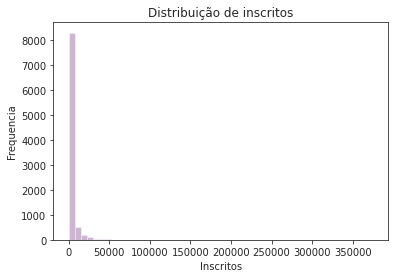

In [8]:
ax = sns.distplot(data['num_subscribers'], kde=False, norm_hist=False)
ax.set_title('Distribuição de inscritos')
ax.set(xlabel='Inscritos', ylabel='Frequencia')
ax

<AxesSubplot:title={'center':'Distribuição de inscritos'}, xlabel='Inscritos', ylabel='Frequencia'>

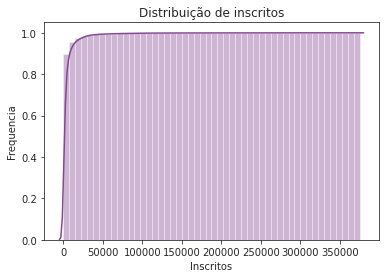

In [9]:
#Para confirmar que existe uma distribuição quase toda em valores muito baixos, 
#estou colocando de forma cumulativa, utilizando códigos do matplotlib. 
ax = sns.distplot(data['num_subscribers'], hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.set_title('Distribuição de inscritos')
ax.set(xlabel='Inscritos', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Inscritos'}, xlabel='num_subscribers'>

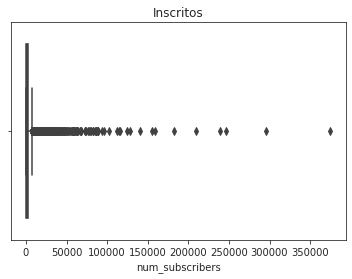

In [10]:
ax = sns.boxplot(data['num_subscribers'])
ax.set_title('Inscritos')
ax

In [11]:
data['num_subscribers'].describe()

count      9263.000000
mean       3447.991040
std       10544.441345
min           3.000000
25%         150.000000
50%         952.000000
75%        2931.000000
max      374836.000000
Name: num_subscribers, dtype: float64

In [12]:
data.query('num_subscribers > 2931').count()

id                              2315
title                           2315
url                             2315
is_paid                         2315
num_subscribers                 2315
avg_rating                      2315
avg_rating_recent               2315
rating                          2315
num_reviews                     2315
is_wishlisted                   2315
num_published_lectures          2315
num_published_practice_tests    2315
created                         2315
published_time                  2315
discount_price__amount          2248
discount_price__currency        2248
discount_price__price_string    2248
price_detail__amount            2315
price_detail__currency          2315
price_detail__price_string      2315
dtype: int64

#### Avaliando o número de inscritos, fica evidente que existem alguns poucos cursos com quantidades imensas de inscritos, esses cursos são, no entanto, interessantes para saber quais variáveis criam cursos com muitos inscritos. Será escolhida duas abordagens, uma tentativa via transformação logarítmica e, posteriormente, dividindo o set em três grupos ABC.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequencia da nota média'}, xlabel='Nota média', ylabel='Frequencia'>

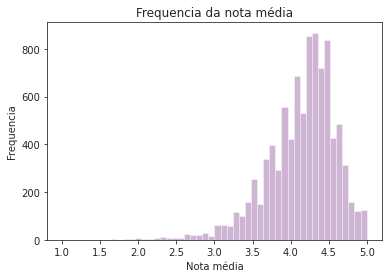

In [13]:
#Seguindo a análise das outras variáveis
ax = sns.distplot(data['avg_rating'], kde=False, norm_hist=False)
ax.set_title('Frequencia da nota média')
ax.set(xlabel='Nota média', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Nota Média'}, xlabel='avg_rating'>

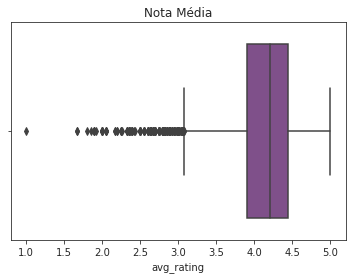

In [14]:
ax = sns.boxplot(data['avg_rating'])
ax.set_title('Nota Média')
ax

#### A nota média tem uma distribuição que tende para a direita, como é esperado do comportamento de avaliação de serviços, em que as pessoas tendem a dar notas mais altas. Aparentemente existem alguns outliers em notas mais baixas. Desconfia-se que são cursos pouco avaliados, vamos seguir no número de avaliações e retomar a avaliação média depois.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequencia de avaliações'}, xlabel='Avaliações', ylabel='Frequencia'>

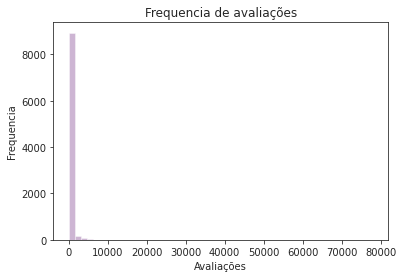

In [15]:
ax = sns.distplot(data['num_reviews'], kde=False, norm_hist=False)
ax.set_title('Frequencia de avaliações')
ax.set(xlabel='Avaliações', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Avaliações'}, xlabel='num_reviews'>

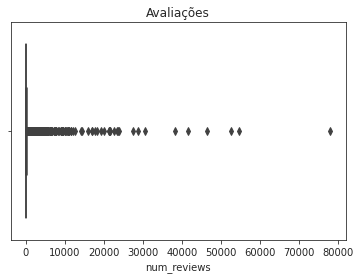

In [16]:
ax = sns.boxplot(data['num_reviews'])
ax.set_title('Avaliações')
ax

In [17]:
data['num_reviews'].describe()

count     9263.000000
mean       303.977221
std       1844.509839
min          3.000000
25%         12.000000
50%         33.000000
75%        112.000000
max      78006.000000
Name: num_reviews, dtype: float64

#### Cursos muito avaliados não devem oferecer o grande problema pois tendem a normalidade na avaliações, porem cursos muito pouco avaliados oferecem um problema pelo maior peso no viés do avaliador. Existe um trade-off entre maior normalidade nas avaliações e menor efeito de cursos pouco procurados. Vou optar por buscar maior normalidade, mas vou escolher retirar somente aqueles abaixo de 9, utilizando o próprio corte do primeiro quartil como medida. Isso deve manter a grande cauda, que demandará uma transformação logarítmica posteriormente. 

In [18]:
data.query('num_reviews >= 9', inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequencia da nota média'}, xlabel='Nota média', ylabel='Frequencia'>

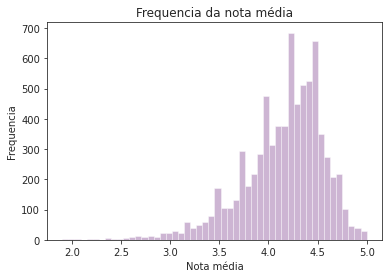

In [19]:
#Vamos rever as notas médias
ax = sns.distplot(data['avg_rating'], kde=False, norm_hist=False)
ax.set_title('Frequencia da nota média')
ax.set(xlabel='Nota média', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Nota Média'}, xlabel='avg_rating'>

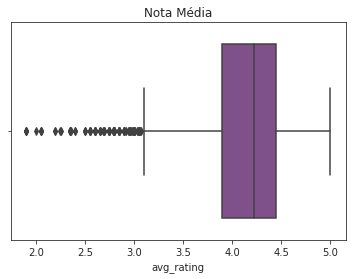

In [20]:
ax = sns.boxplot(data['avg_rating'])
ax.set_title('Nota Média')
ax

#### Seguindo a análise das outras variáveis.

In [21]:
#Desconfiando de que existam na no desconto em cursos sem desconto, é melhor verificar.
data['discount_price__amount'].isna().sum()

377

In [22]:
data['discount_price__amount'] = data['discount_price__amount'].fillna(0)
data['discount_price__amount'].isna().sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequencia de desconto do curso'}, xlabel='Desconto', ylabel='Frequencia'>

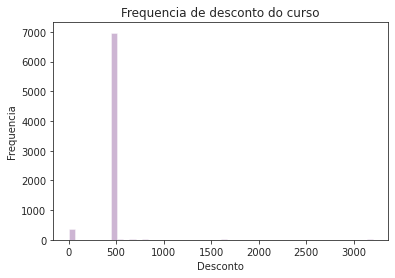

In [23]:
ax = sns.distplot(data['discount_price__amount'], kde=False, norm_hist=False)
ax.set_title('Frequencia de desconto do curso')
ax.set(xlabel='Desconto', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Desconto'}, xlabel='discount_price__amount'>

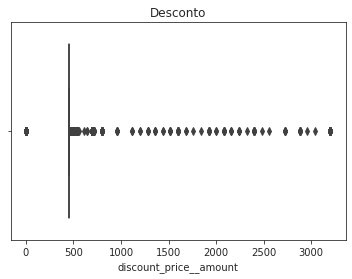

In [24]:
ax = sns.boxplot(data['discount_price__amount'])
ax.set_title('Desconto')
ax

#### Os descontos são extremamente concentrados e estão com valor absoluto. Para melhor entender o efeito do desconto vou optar por duas linhas de ação, colocar eles relativo ao preço total e criar uma variável dummy tem desconto e não tem desconto, verificando qual irá servir melhor ao modelo. 

In [25]:
data['desconto_relativo'] = data['discount_price__amount']/data['price_detail__amount']

In [26]:
data['tem_desconto'] = data['discount_price__amount'].apply(lambda x: 'Sim' if x>0 else 'Não')
data['tem_desconto'].value_counts()

Sim    7202
Não     377
Name: tem_desconto, dtype: int64

In [27]:
#O valor de 0, portanto sem desconto, está igual, a dummy funcionou.
data['discount_price__amount'].value_counts()

455.0     6702
0.0        377
468.0      115
462.0       40
700.0       37
481.0       36
520.0       29
474.0       26
3200.0      26
800.0       23
488.0       22
494.0       16
1600.0      11
2400.0       9
2880.0       9
720.0        8
500.0        7
1920.0       7
2080.0       7
514.0        5
960.0        5
507.0        5
2720.0       5
1520.0       5
480.0        4
1280.0       4
1360.0       4
2240.0       4
2160.0       3
1120.0       3
540.0        2
2000.0       2
1200.0       2
640.0        2
1440.0       2
1680.0       2
546.0        2
552.0        1
2560.0       1
2320.0       1
2960.0       1
1840.0       1
3040.0       1
2480.0       1
1760.0       1
533.0        1
611.0        1
560.0        1
Name: discount_price__amount, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequencia de desconto relativo ao preço'}, xlabel='Desconto', ylabel='Frequencia'>

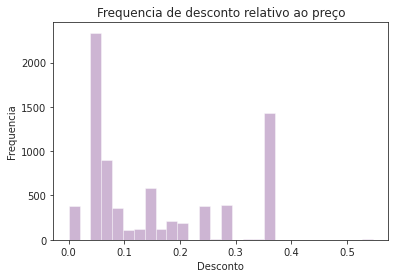

In [28]:
ax = sns.distplot(data['desconto_relativo'], kde=False, norm_hist=False)
ax.set_title('Frequencia de desconto relativo ao preço')
ax.set(xlabel='Desconto', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Desconto relativo ao preço'}, xlabel='desconto_relativo'>

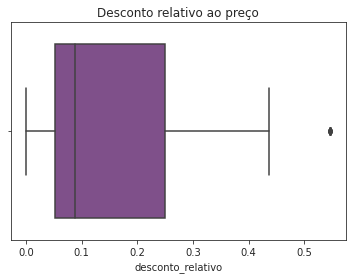

In [29]:
ax = sns.boxplot(data['desconto_relativo'])
ax.set_title('Desconto relativo ao preço')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Tem desconto?'}, xlabel='Sim ou Não', ylabel='Frequencia'>

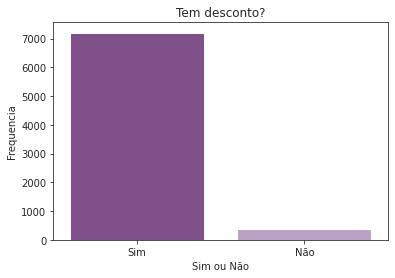

In [30]:
ax = sns.countplot(data['tem_desconto'])
ax.set_title('Tem desconto?')
ax.set(xlabel='Sim ou Não', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequencia do custo do curso'}, xlabel='Custo', ylabel='Frequencia'>

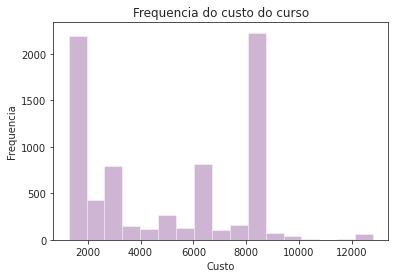

In [31]:
#Seguindo para a análise de preço absoluto
ax = sns.distplot(data['price_detail__amount'], kde=False, norm_hist=False)
ax.set_title('Frequencia do custo do curso')
ax.set(xlabel='Custo', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Custo'}, xlabel='price_detail__amount'>

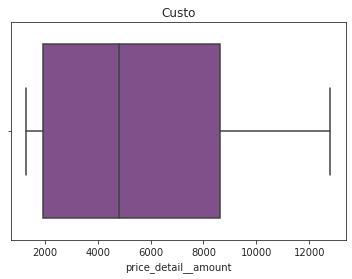

In [32]:
ax = sns.boxplot(data['price_detail__amount'])
ax.set_title('Custo')
ax

#### A transgformação logarítmica será necessária para normalizar a distribuição das amostras.

In [33]:
data['log_inscritos'] = np.log(data['num_subscribers'])
data['log_avaliacao_media'] = np.log(data['avg_rating'])
data['log_desconto_relativo'] = np.log(data['desconto_relativo']+1)
data['log_valor'] = np.log(data['price_detail__amount'])
data['log_aulas_publicadas'] = np.log(data['num_published_lectures'])
data['log_n_avaliacoes'] = np.log(data['num_reviews'])


In [34]:
data['tem_desconto'].describe()

count     7579
unique       2
top        Sim
freq      7202
Name: tem_desconto, dtype: object

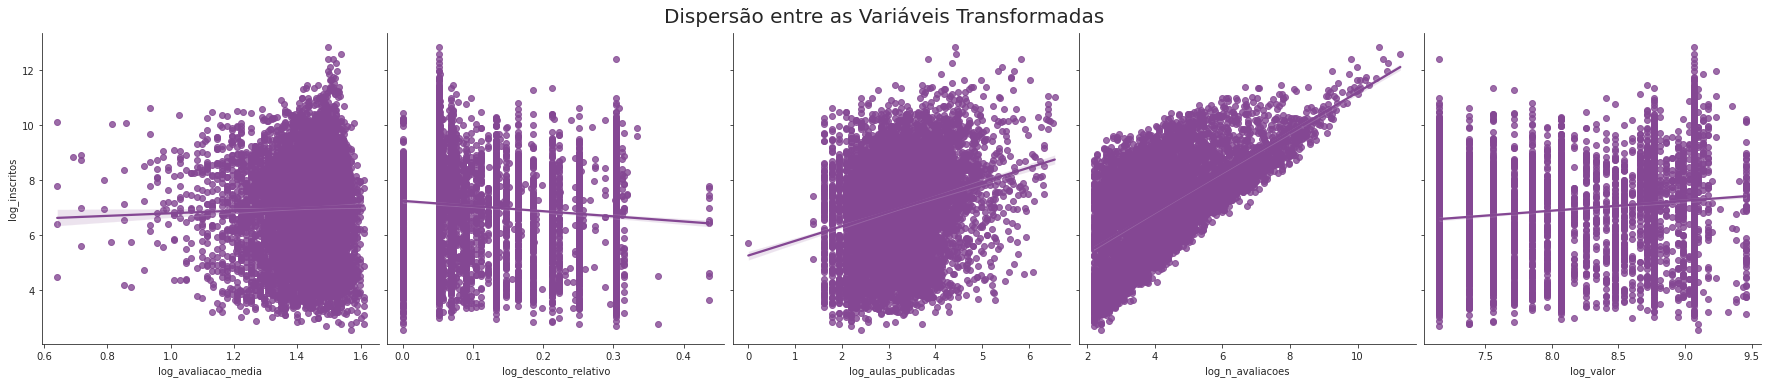

In [35]:
ax = sns.pairplot(data, y_vars='log_inscritos', x_vars=['log_avaliacao_media','log_desconto_relativo',
                                              'log_aulas_publicadas','log_n_avaliacoes', 'log_valor'], height=5, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

#### As distribuições não estão ideais, mas vamos seguir com o modelo para verificar o ajuste. 

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
y = data['log_inscritos']
X = data[['log_avaliacao_media','log_desconto_relativo','log_valor',
                                              'log_aulas_publicadas','log_n_avaliacoes']]

In [38]:
#Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [39]:
#A constante vai ser adicionada no treino para testar o treino com OLS
import statsmodels.api as sm
X_train_com_constante = sm.add_constant(X_train)

In [40]:
modelo_stats_models = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [41]:
print(modelo_stats_models.summary())

                            OLS Regression Results                            
Dep. Variable:          log_inscritos   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     895.4
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:42:15   Log-Likelihood:                -10258.
No. Observations:                6063   AIC:                         2.053e+04
Df Residuals:                    6057   BIC:                         2.057e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.50

#### O modelo saiu com uma probabilidade F abaixo de 0.00, o que indica significância, o Rquadrado de 0.4 é baixo, mas esperado para comportamentos humanos do tipo. 

#### O modelo revela que um maior número de avaliações está fortemente correlacionado com o número de inscritos em um curso, o que é imaginável desde o início, pois é uma correlação de cursos com mais inscritos e mais avaliados. Como resultados interessantes tem-se:
#### Cursos com mais aulas potencialmente atraem mais alunos.
#### Descontos maiores atraem mais alunos.
#### Cursos com mais alunos tendem a ter avaliações piores.
#### Os descontos proporcionais tem um efeito maior que o valor absoluto. 
#### Cursos mais caros atraem mais alunos, isso é estranho a primeira vista, mas é normal, considerando que o Udemy conhece os cursos que terão mais demanda por razões exógenas ao modelo e aumentam o preço. 

#### Vamos avaliar o ajuste com dados de treino no teste

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [43]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [44]:
y_previsto = modelo.predict(X_test)

In [45]:
#O R² está muito parecido, como esperado.
print('R² %s' % metrics.r2_score(y_test, y_previsto))

R² 0.3978973877750631


In [46]:
#Vamos gerar as previsões para os dados de treino
y_previsto_train = modelo.predict(X_train)

<AxesSubplot:title={'center':'Previsão vs Amostra'}, xlabel='Previsão', ylabel='Amostra'>

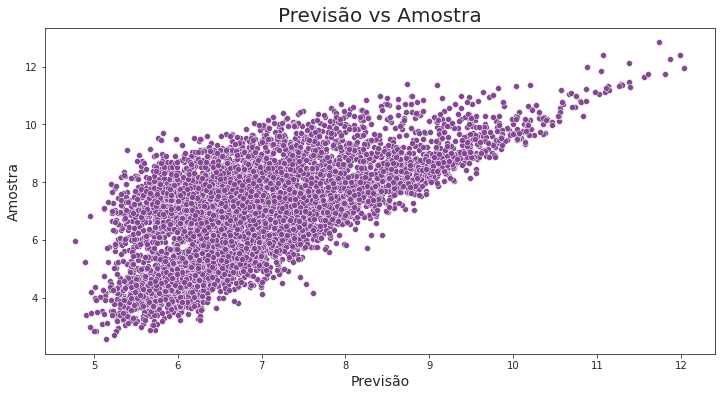

In [47]:
#Vamos criar um gráfico de dispersão utilizando o dado previsto usando o modelo e o dado de treino.
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão vs Amostra', fontsize=20)
ax.set_xlabel('Previsão', fontsize=14)
ax.set_ylabel('Amostra', fontsize=14)
ax

#### O desconto relativo já deu um excelente resultado, vamos testar segmentando a amostra, pois a variável dummy não parece ter sido necessária. 

In [48]:
pip install inventorize3

  Preparing metadata (setup.py) ... - done
  Created wheel for inventorize3: filename=inventorize3-0.0.1-py3-none-any.whl size=15605 sha256=b15addd6d1c0a8c6caf0adb7f05af44c88d1f88469ad29a4807a40cc7db61fb7
  Stored in directory: /root/.cache/pip/wheels/10/81/ca/1b8df04e233213dc92a89f64f56f04eeba6e6f1f12ba264de3
Successfully built inventorize3
Note: you may need to restart the kernel to use updated packages.


In [49]:
import inventorize3 as inv

In [50]:
ABC = inv.ABC(data[['id', 'num_subscribers']])

In [51]:
ABC

,id,num_subscribers,Percentage,comulative,Category
4,637930,374836,1.201166e-02,0.012012,A
0,762616,295509,9.469615e-03,0.021481,A
3,648826,245860,7.878608e-03,0.029360,A
19,980086,239309,7.668681e-03,0.037029,A
1,937678,209070,6.699669e-03,0.043728,A
...,...,...,...,...,...
7382,2907260,16,5.127216e-07,0.999998,C
7233,3189840,16,5.127216e-07,0.999999,C
7235,937316,16,5.127216e-07,0.999999,C
7665,2094878,15,4.806765e-07,1.000000,C


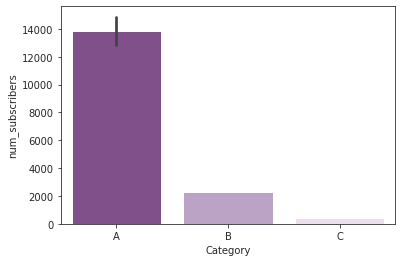

In [52]:
ax = sns.barplot(data=ABC, x='Category', y='num_subscribers')

In [53]:
ABC = ABC[['id', 'Category']]
ABC.head()

,id,Category
4,637930,A
0,762616,A
3,648826,A
19,980086,A
1,937678,A


In [54]:
data = pd.merge(ABC, data, on='id')
data.head()

,id,Category,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,...,price_detail__currency,price_detail__price_string,desconto_relativo,tem_desconto,log_inscritos,log_avaliacao_media,log_desconto_relativo,log_valor,log_aulas_publicadas,log_n_avaliacoes
0,637930,A,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,...,INR,"₹8,640",0.052662,Sim,12.834244,1.497567,0.051322,9.064158,4.418841,10.636576
1,762616,A,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,...,INR,"₹8,640",0.052662,Sim,12.596455,1.539056,0.051322,9.064158,4.430817,11.264541
2,648826,A,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,...,INR,"₹8,640",0.052662,Sim,12.412518,1.513823,0.051322,9.064158,5.823046,10.746067
3,980086,A,Deep Learning Prerequisites: The Numpy Stack i...,/course/deep-learning-prerequisites-the-numpy-...,True,239309,4.47381,4.54005,4.54005,18322,...,INR,"₹1,280",0.355469,Sim,12.385511,1.498240,0.304147,7.154615,3.850148,9.815858
4,937678,A,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,...,INR,"₹8,640",0.052662,Sim,12.250424,1.523784,0.051322,9.064158,4.356709,10.907441


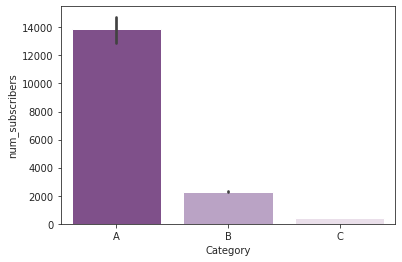

In [55]:
#Comparando gráficos para ter certeza
ax = sns.barplot(data=data, x='Category', y='num_subscribers')

In [56]:
data['Category'].value_counts(normalize=True)

C    0.491754
B    0.270352
A    0.237894
Name: Category, dtype: float64

#### Como a categoria A está nos 23% cursos com mais inscritos, interessando a essa análise.

In [57]:
data_A = data[data['Category'] == 'A']
data_A['Category'].value_counts()

A    1803
Name: Category, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de inscritos'}, xlabel='Inscritos', ylabel='Frequencia'>

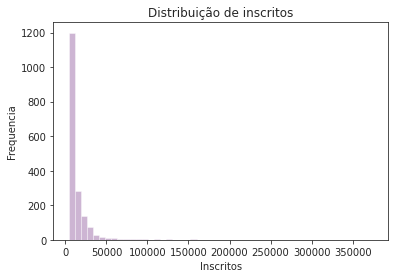

In [58]:
ax = sns.distplot(data_A['num_subscribers'], kde=False, norm_hist=False)
ax.set_title('Distribuição de inscritos')
ax.set(xlabel='Inscritos', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Inscritos'}, xlabel='num_subscribers'>

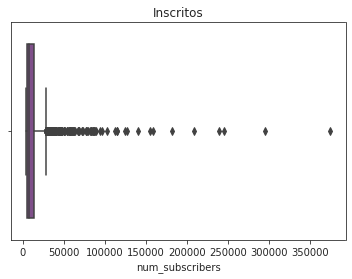

In [59]:
ax = sns.boxplot(data_A['num_subscribers'])
ax.set_title('Inscritos')
ax

In [60]:
data_A = data_A[['num_subscribers', 'avg_rating', 'desconto_relativo', 'price_detail__amount', 
                'num_published_lectures', 'num_reviews']]

In [61]:
data_A['log_inscritos'] = np.log(data_A['num_subscribers'])
data_A['log_avaliacao_media'] = np.log(data_A['avg_rating'])
data_A['log_desconto_relativo'] = np.log(data_A['desconto_relativo']+1)
data_A['log_valor'] = np.log(data_A['price_detail__amount'])
data_A['log_aulas_publicadas'] = np.log(data_A['num_published_lectures'])
data_A['log_n_avaliacoes'] = np.log(data_A['num_reviews'])


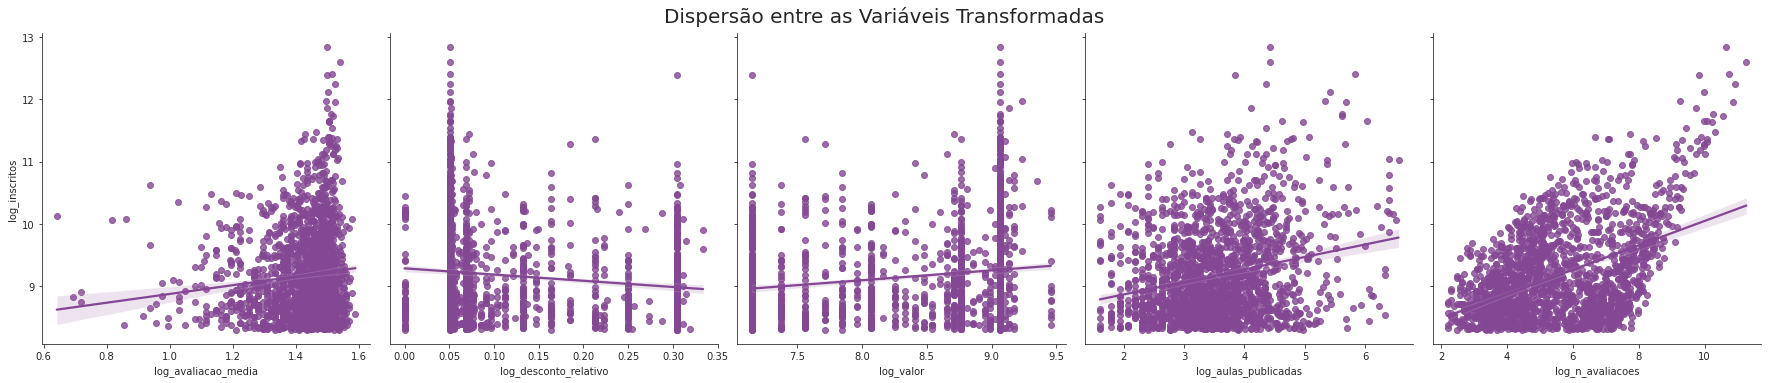

In [62]:
ax = sns.pairplot(data_A, y_vars='log_inscritos', x_vars=['log_avaliacao_media','log_desconto_relativo','log_valor',
                                              'log_aulas_publicadas','log_n_avaliacoes'], height=5, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

In [63]:
y = data['log_inscritos']
X = data[['log_avaliacao_media','log_desconto_relativo','log_valor',
                                              'log_aulas_publicadas','log_n_avaliacoes']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [65]:
X_train_com_constante = sm.add_constant(X_train)

In [66]:
modelo_stats_models = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [67]:
print(modelo_stats_models.summary())

                            OLS Regression Results                            
Dep. Variable:          log_inscritos   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     879.7
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:42:36   Log-Likelihood:                -10241.
No. Observations:                6063   AIC:                         2.049e+04
Df Residuals:                    6057   BIC:                         2.053e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.14